In [ ]:
install.packages("kknn")
install.packages("ggcorrplot")

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(ggcorrplot)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

# Predicting The Occurrence of Exercised Induced-Angina by Analysis of Age and Maximum Heart Rate
Angelyca  P, Jay P, Elaine S 

# Introduction: 

### Background Information: 

Angina is categorized as a type of chest pain due to a reduced blood flow to the heart. Specific to this project, exercise induced angina is being analyzed and predicted. Exercise induced angina is a distinct class of angina, as the symptoms only occur when triggered by exercise. When the body is at rest, there is a lower demand of oxygen, allowing the heart to properly function despite the limiting amount of blood flow, with the absence of angina symptoms. Whereas, during exercise, the body will have an increased demand of oxygen, and thus blood flow. However, in this case, the heart is unable to function with the lack of oxygen, without experiencing chest pain sensations, or angina symptoms. Many studies have shown that increasing age is often accompanied with a greater risk of experiencing general angina. Studies have shown that increasing age is often accompanied with a greater risk of experiencing angina (chest pain). 

To conduct our data analysis, a number of different combinations of two predictors will be tested, where the best combination will be chosen and used as predictors for classifying the occurrence of exercise induced angina. A knn classification model will be created and tested for this type of data analysis. 


### Predictive Question: Will the individual experience exercise induced angina? 



Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): major_vessels, thal
dbl (12): age, sex, chest_pain_type, resting_bp, chol, fasting_bs, rest_ecg,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_bp,chol,fasting_bs,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope_peak_exercise,major_vessels,thal,diagnosis_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


age,max_rate,exercise_induced_angina
<int>,<int>,<dbl>
63,150,0
67,108,1
67,129,1
⋮,⋮,⋮
68,141,0
57,115,1
57,174,0


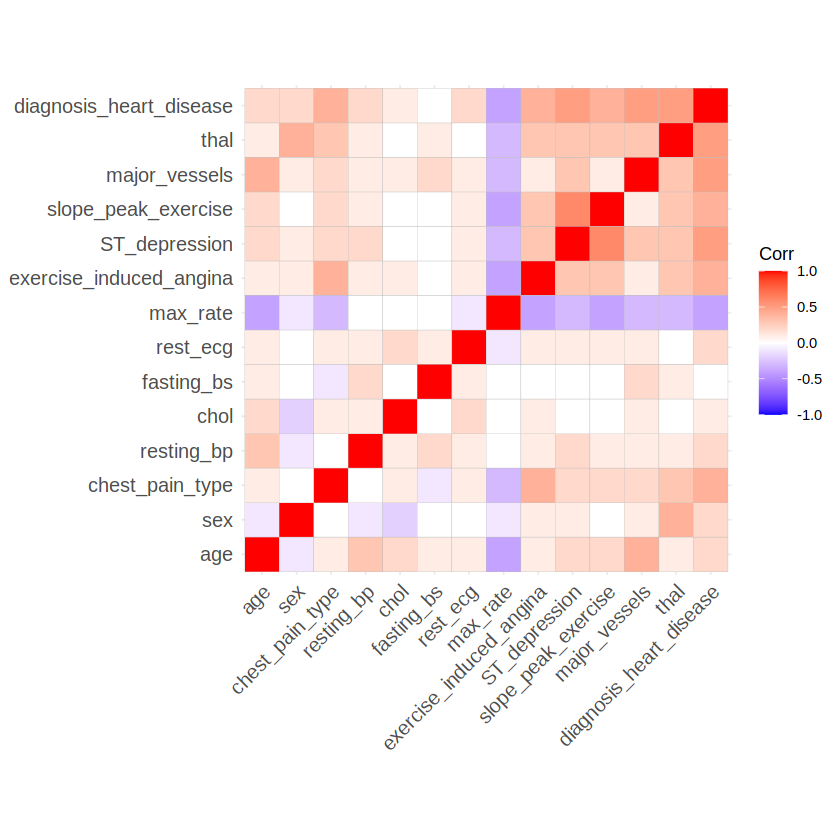

In [24]:
# Downloading the raw dataset from the web and renaming columns.
url <- "https://raw.githubusercontent.com/elaines6/dsci-100-group-project/main/processed.cleveland.data"

heart_raw_data <- read_csv(url, col_names = c("age", "sex", "chest_pain_type", "resting_bp", "chol", "fasting_bs", "rest_ecg", "max_rate",
                                             "exercise_induced_angina", "ST_depression", "slope_peak_exercise", "major_vessels", "thal", "diagnosis_heart_disease"))

# Using the as_factor function to change variables to character values
missing <- heart_raw_data == "?"
is.na(heart_raw_data) <- missing 

heart_clean <- na.omit(heart_raw_data)|>
mutate(major_vessels = as.integer(major_vessels), thal = as.integer(thal))

heart_clean 
corr <- round(cor(heart_clean), 1)
ggcorrplot(corr)

#what is this part for?!! 
unscaled_heart_data <- heart_clean |>
    select(age, max_rate, exercise_induced_angina) |>
    mutate(age = as.integer(age), max_rate = as.integer(max_rate))


# Checking if standardizing the data matters for plotting 
# There is no difference between plotting standardized or unstandardized data 
unscaled_heart_data_to_check <- heart_clean |>
    select(max_rate, age, exercise_induced_angina) |>
    mutate(age = as.integer(age), max_rate = as.integer(max_rate))


# After deciding the which plot to use, we decided to use heart_plot_four, which is age and max_rate 
# heart_plot_four presents the best data to use for a classification question/model 
# used ggcorrplot to summarize our process of testing variation of combinations and analyzing which combination is the best one

final_unscaled_heart_data <- heart_clean |>
    select(age, max_rate, exercise_induced_angina) |>
    mutate(age = as.integer(age), max_rate = as.integer(max_rate)) 

final_unscaled_heart_data 

In [25]:
# Seeing if there are any NA/missing values from the dataset.

heart_raw_data[heart_raw_data == "?"] <- NA

heart_raw_data %>%
    map_df(~sum(is.na(.x)))

age,sex,chest_pain_type,resting_bp,chol,fasting_bs,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope_peak_exercise,major_vessels,thal,diagnosis_heart_disease
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,4,2,0


In [26]:
# Clean and tidy dataset
heart_clean

age,sex,chest_pain_type,resting_bp,chol,fasting_bs,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope_peak_exercise,major_vessels,thal,diagnosis_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [27]:
### Calculating the average values of the each columns. This means that I cannot get the average of everything.  
mean_of_columns<- heart_clean |>
select(age:diagnosis_heart_disease) |>
  map_dfr(mean)

head(mean_of_columns)



age,sex,chest_pain_type,resting_bp,chol,fasting_bs,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope_peak_exercise,major_vessels,thal,diagnosis_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.54209,0.6767677,3.158249,131.6936,247.3502,0.1447811,0.996633,149.5993,0.3265993,1.055556,1.602694,0.6767677,4.73064,0.9461279


In [62]:
heart_clean<-heart_clean|>
mutate(exercise_induced_angina=as_factor(exercise_induced_angina))
heart_clean

age,sex,chest_pain_type,resting_bp,chol,fasting_bs,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope_peak_exercise,major_vessels,thal,diagnosis_heart_disease,as_factor(exercise_induced_angina)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,0
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,0


From this cell to plot below is for checking whether the standardized data matters for deciding the best predictors

(Note: is this cell necessary because we're adding ggcorrplot in later anyways so maybe not?) 

In [63]:
# Scaling and centering all predictors/values of the dataset
heart_recipe <- recipe(exercise_induced_angina ~ ., data = unscaled_heart_data_to_check) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
    prep()

# The standardized dataset 
scaled_heart_rate <- bake(heart_recipe, unscaled_heart_data_to_check)
scaled_heart_rate

max_rate,age,exercise_induced_angina
<dbl>,<dbl>,<dbl>
0.01746496,0.9346033,0
-1.81327350,1.3766051,1
-0.89790427,1.3766051,1
⋮,⋮,⋮
-0.3748361,1.4871056,0
-1.5081504,0.2716005,1
1.0636012,0.2716005,0


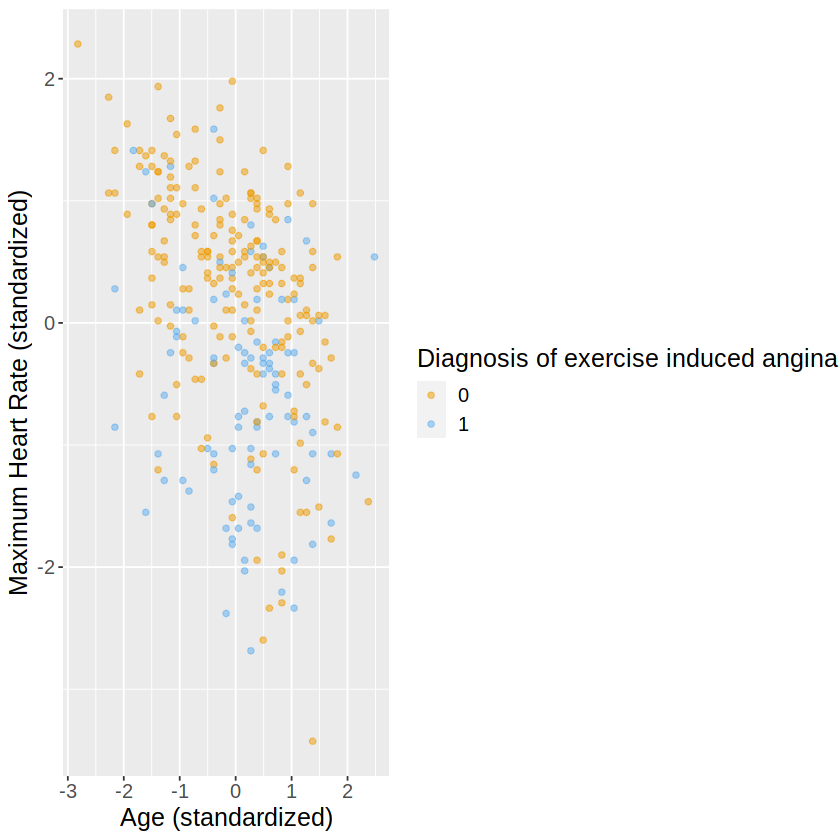

In [64]:
#
heart_plot_testing <- scaled_heart_rate |>
    ggplot(aes(x = age, y = max_rate, color = as_factor(exercise_induced_angina)))+ 
    geom_point(alpha = 0.5) +
    labs(x = "Age (standardized)", 
         y = "Maximum Heart Rate (standardized)",
         color = "Diagnosis of exercise induced angina") +
    scale_color_manual(values = c("orange2", "steelblue2")) + 
    theme(text = element_text(size = 15))

heart_plot_testing 

# can we get rid of this? what is the purpose of this graph ? is it just test if theres a difference between standardized and unstandardized 

In [65]:
# Getting the number of samples in the plot 4, but do I need to upsample this??
# Computing the total number of observations in the dataset. 
final_unscaled_heart_data|>
    group_by(exercise_induced_angina)|>
    summarize(count= n())

exercise_induced_angina,count
<dbl>,<int>
0,200
1,97


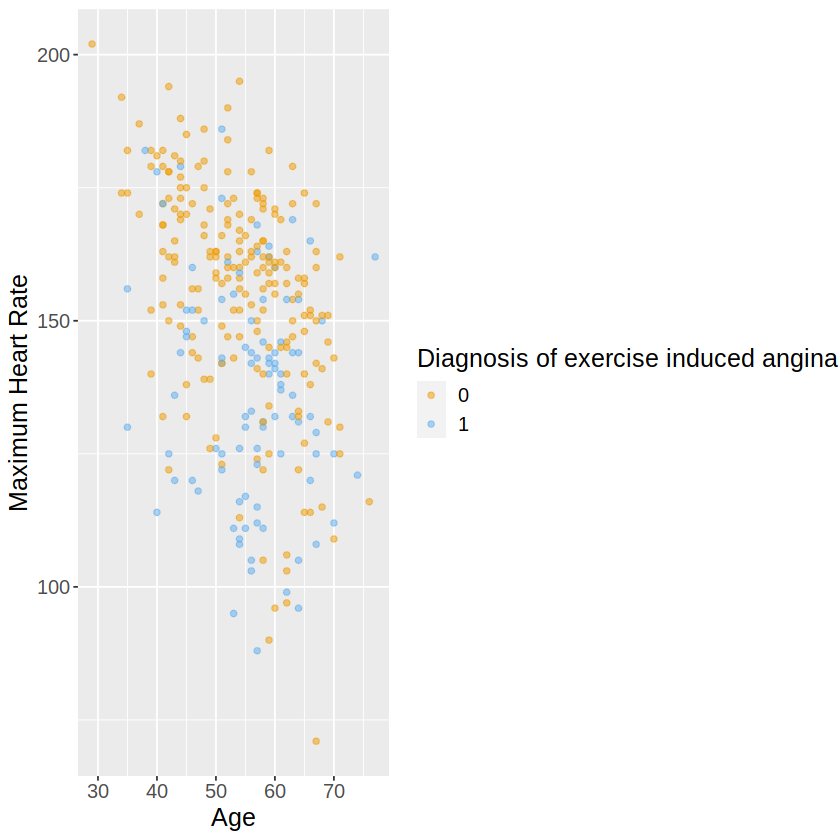

In [66]:
#Plotting unstandardized data vs standardized data to visualize if there are any differences 
heart_plot_four <- heart_clean |>
    ggplot(aes(x = age, y = max_rate, color = as_factor(exercise_induced_angina))) + 
    geom_point(alpha = 0.5) +
    labs(x = "Age", 
         y = "Maximum Heart Rate",
         color = "Diagnosis of exercise induced angina") +
    scale_color_manual(values = c("orange2", "steelblue2")) + 
    theme(text = element_text(size = 15))

heart_plot_four

In [74]:
# Splitting the data into a training and testing test 
set.seed(1234)
heart_split <- initial_split(heart_clean, prop = 0.75, strata = exercise_induced_angina)
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

In [75]:
# Getting the proportion of the induced_angina in the training set 
heart_proportions <- heart_train |>
                      group_by(exercise_induced_angina) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_train))

heart_proportions

exercise_induced_angina,n,percent
<fct>,<int>,<dbl>
0,150,67.56757
1,72,32.43243


In [80]:
# Creating a recipe for predicting the class of exericse induced angina based on the two predictors of age and max rate. 
heart_recipe <- recipe(exercise_induced_angina ~ age + max_rate, data = heart_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [81]:
# Creating a classification model 
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6399209,10,0.02169877,Preprocessor1_Model01
3,accuracy,binary,0.6764822,10,0.03803291,Preprocessor1_Model02
5,accuracy,binary,0.6901186,10,0.03827490,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,accuracy,binary,0.6938735,10,0.04059751,Preprocessor1_Model23
47,accuracy,binary,0.6936759,10,0.04176257,Preprocessor1_Model24
49,accuracy,binary,0.7025692,10,0.03759820,Preprocessor1_Model25


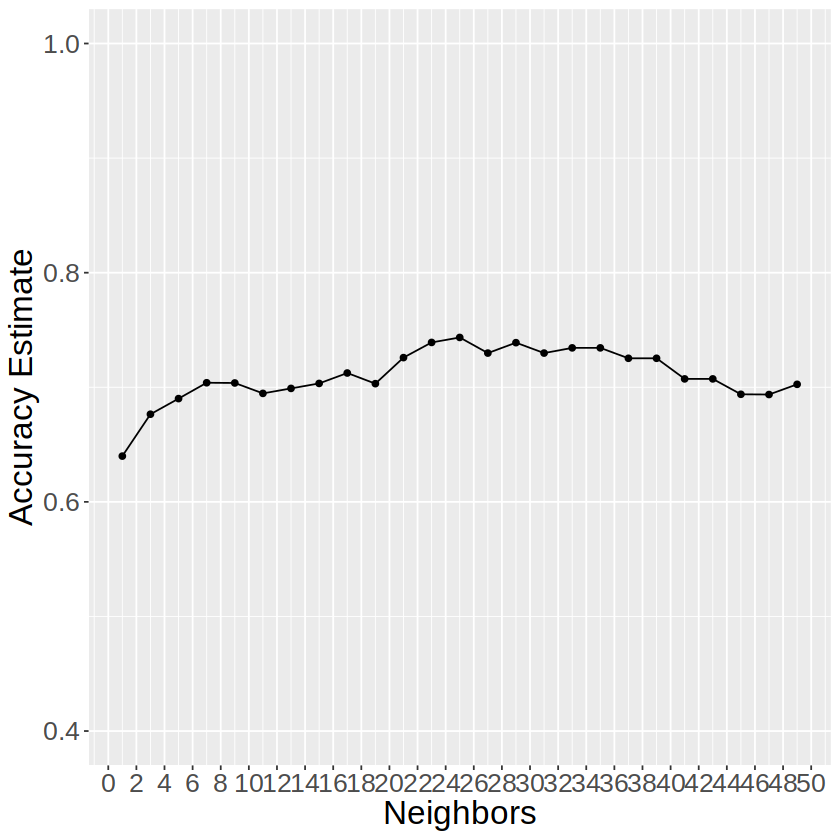

In [82]:
# Performing cross-validation on the training data 
set.seed(1234) 
heart_vfold <- vfold_cv(heart_train, v = 10, strata = exercise_induced_angina)

# Creating a data frame with k variable values that will be tested for accuracies 
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

# Computing all metrics of training data with specified k values above  
knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics() 

# Filtered for only the accuracy metric  
accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

# Use a scatterplot to visualize the accuracy based on the knn neighbor values 
# Choose the best knn value based on the highest accuracy value   
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20)) +
                     scale_x_continuous(breaks = seq(0, 50, by = 2)) +
                     scale_y_continuous(limits = c(0.4, 1.0))
accuracy_versus_k

In [79]:
# Creating a new classification model with computed ideal k value 
final_heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 42) |>
       set_engine("kknn") |>
       set_mode("classification")

# Fitting the training data to the ideal k value classification model 
final_heart_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(final_heart_spec) |>
            fit(data = heart_train)
final_heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(42,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2612613
Best kernel: rectangular
Best k: 42

In [73]:
# Predicting the class label of the testing data in the fitted workflow 
heart_predictions <- predict(final_heart_fit, heart_test) |>
                        bind_cols(heart_test)
heart_predictions
 
# Extracting the metrics aka the accuracy of the model 
heart_metrics <- heart_predictions |> metrics(truth = exercise_induced_angina, estimate = .pred_class)

# Extracting the confusion matrix table 
heart_conf_mat <- heart_predictions |>
                        conf_mat(truth = exercise_induced_angina, estimate = .pred_class) 
heart_metrics
heart_conf_mat

# Top left value = True negative, Top right value = False negative 
# Bottom left value = False positive, Bottom right value = True positive 

.pred_class,age,sex,chest_pain_type,resting_bp,chol,fasting_bs,rest_ecg,max_rate,exercise_induced_angina,ST_depression,slope_peak_exercise,major_vessels,thal,diagnosis_heart_disease,as_factor(exercise_induced_angina)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,0
0,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3,0
1,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0,0
0,63,0,4,124,197,0,0,136,1,0.0,2,0,3,1,1
1,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7866667
kap,binary,0.4782609


          Truth
Prediction  0  1
         0 46 12
         1  4 13

# Discussion 

#### Summarize your findings here!! 

The accuracy for our classification model is computed to be 76.35% as shown above in the metrics table. This accuracy metric indicates that our classification model will accurately predict the occurrence of exercise induced angina, given an unknown observation, 76.35% of the time. As for the confusion matrix table, there are some important findings to note. Specific to this data analysis of exercise induced angina, the false negative prediction is the most serious. Specific to this case study, a false negative prediction occurs when an individual with exercise induced angina, is predicted to not have exercise induced angina. The false negative prediction for this data set is computed to occur 18 times for every 76 predictions. As for the others (false negative, false positive, true negative), they hold a less significant impact on the predictions. 



total 76 predictions 


#### What impact could such findings have? 
Such findings of this data analysis would be able to predict whether or not individuals will experience exercise induced angina, based on their maximum heart rate and age. 


#### What future questions could this lead to?
What other predictors could be used to accurately predict whether an individual will exercise induced angina ? Can the occurrence of exercise induced angina be a predictor of other underlying cardiac health issues (if an individual experiences exercise induced angina, are they at a higher risk for cardiac arrest, stroke, and other complications ?)





### References: (cite these at the end) 

https://archive.ics.uci.edu/dataset/45/heart+disease


https://www.ahajournals.org/doi/10.1161/01.CIR.0000086898.96021.B9#:~:text=Pain%20in%20the%20left%20chest,more%20frequent%20with%20advancing%20age.
